<a href="https://colab.research.google.com/github/hermathena/Restaurant-Revenue-Prediction/blob/main/Restaurant_Revenue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install catboost
!pip install pingouin
!pip install shap
!pip install skimpy
!pip install ppscore

In [4]:
# Data manipulation
#===========================================================================
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

# Data visualization
#===========================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

# Stats
#===========================================================================
from scipy import stats
import pingouin as pg
import statsmodels.api as sm
import ppscore as pps

# Preprocessing
#===========================================================================
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Classifier Models
#===========================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Regression Models
#===========================================================================
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Metrics
#===========================================================================
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Feature importance
#===========================================================================
import shap

# tqdm
#===========================================================================
from tqdm.auto import tqdm

# Warnings
#===========================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving restaurant_revenue.csv to restaurant_revenue.csv


In [5]:
data = pd.read_csv("restaurant_revenue.csv")

In [6]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1000   │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 8      │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA  ┃ NA %   ┃ mean   ┃ sd   ┃ p0       ┃ p25  ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Number_of_Customers       │   0 │      0 │     53 │   26 │       10 │   30 │   54 │   74 │    99 │ ▇▇▇▇▇▇  │  │
│ │ Menu_Price                │   0 │      0 │     30 │   11 │       10 │   20 │   31 │   40 │    50 │ ▇▆▇▇▇▆  │  │
│ │ Marketing_Spend           │   0 │      0 │     10 │  5.8 │   0.0038 │  4.7 │   10 │   15 │    20 │ ▇▇▇▇▇▇  │  │
│ │ Average_Customer_Spending │   0 │      0 │     29 │   11 │       10 │   20 │   29 │   40 │    50 │ ▇▇▆▆▇▆  │  │
│ │ Promotions                │   0 │      0 │    0.5 │  0.5 │        0 │    0 │    0 │    1 │     1 │ ▇    ▇  │  │
│ │ Reviews                   │   0 │      0 │     50 │   29 │        0 │   24 │   50 │   76 │    99 │ ▇▇▇▆▇▇  │  │
│ │ Monthly_Revenue           │   0 │      0 │    270 │  100 │      -29 │  200 │  270 │  340 │   560 │ ▁▃▇▇▃▁  │  │
│ └───────────────────────────┴─────┴────────┴────────┴──────┴──────────┴──────┴──────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Cuisine_Type               │      0 │          0 │                            1 │                     1000 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [7]:
data.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


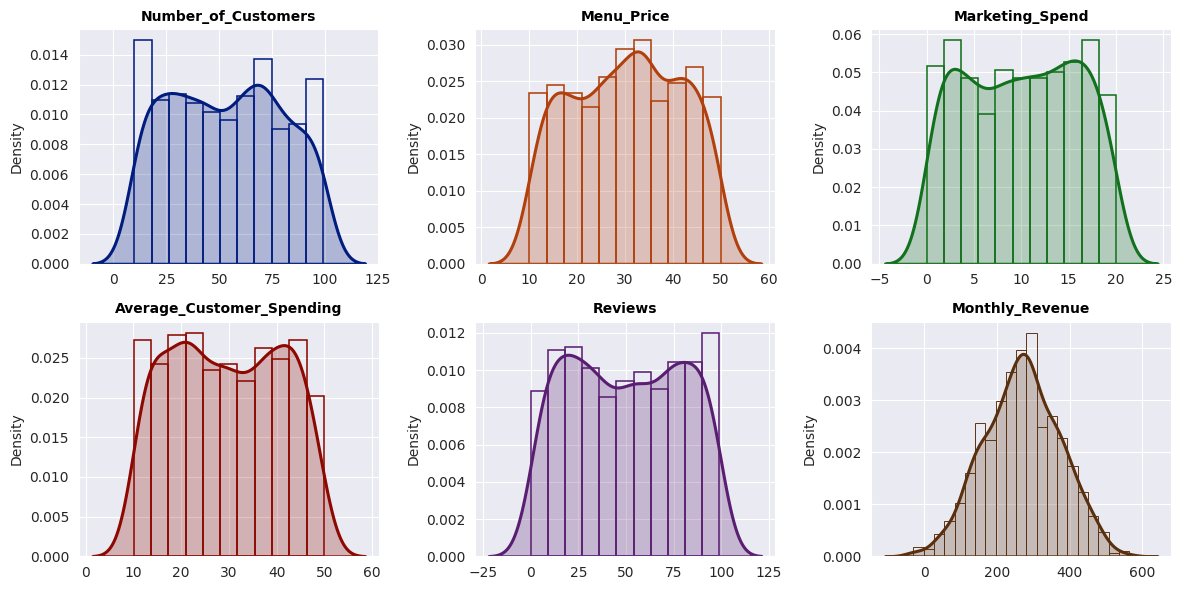

In [8]:
sns.set_style('darkgrid')
numerical_cols = ['Number_of_Customers', 'Menu_Price', 'Marketing_Spend',
                  'Average_Customer_Spending', 'Reviews', 'Monthly_Revenue']

colors = sns.color_palette(palette = 'dark', n_colors = len(numerical_cols))

fig,axs = plt.subplots(nrows = 2, ncols = 3, figsize = (12,6))
axs = axs.flat

for i,col in enumerate(numerical_cols):
    sns.kdeplot(data, x = col, color = colors[i], fill = True, linewidth = 2.2, ax = axs[i])
    sns.histplot(data, x = col, stat = 'density', color = colors[i], fill = False, ax = axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(col, fontsize = 10, fontweight = 'bold', color = 'black')

fig.tight_layout()
fig.show()

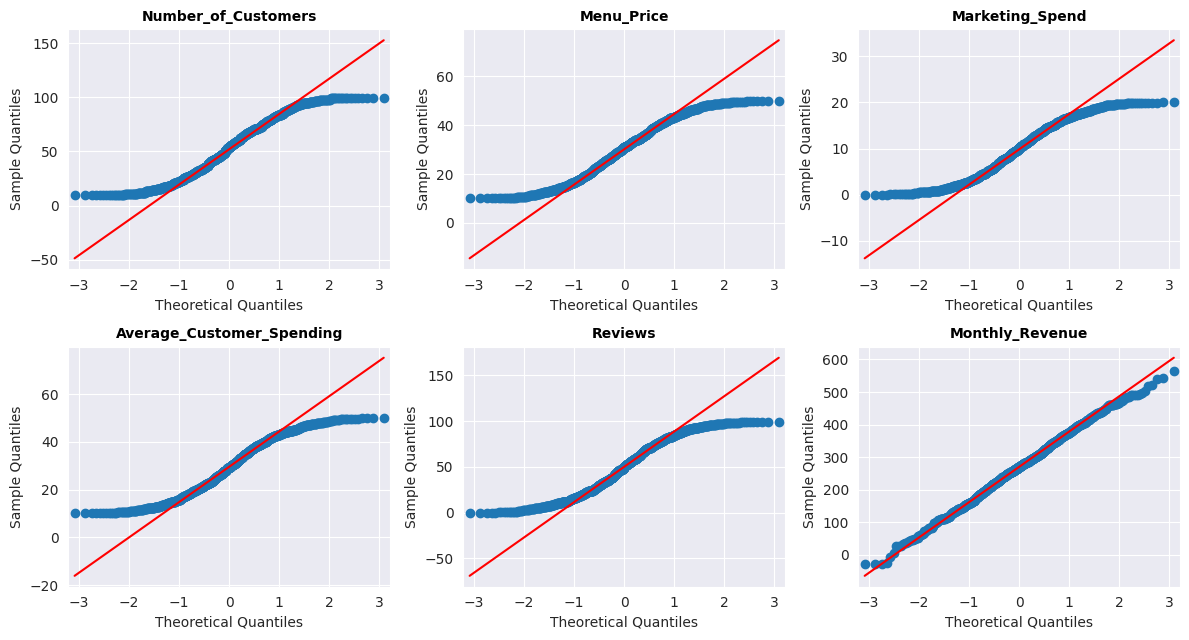

In [9]:
fig,axs = plt.subplots(nrows = 2, ncols = 3, figsize = (12,6.5))
axs = axs.flat

for i,col in enumerate(numerical_cols):
    sm.qqplot(data[col], line = 'q', ax = axs[i])
    axs[i].set_title(col, fontsize = 10, fontweight = 'bold', color = 'black')

fig.tight_layout()
fig.show()

In [10]:
def normality_test(name:str):
    p_value = stats.shapiro(data[name])[1]
    decision = "No" if p_value < 0.05 else "Yes"
    return decision

In [11]:
print("==" * 30)
print(" " * 21, "Shapiro Test")
print("==" * 30)
for col in numerical_cols:
    print(f'* {col}: {normality_test(col)}')
    print('--' * 30)

                      Shapiro Test
* Number_of_Customers: No
------------------------------------------------------------
* Menu_Price: No
------------------------------------------------------------
* Marketing_Spend: No
------------------------------------------------------------
* Average_Customer_Spending: No
------------------------------------------------------------
* Reviews: No
------------------------------------------------------------
* Monthly_Revenue: Yes
------------------------------------------------------------


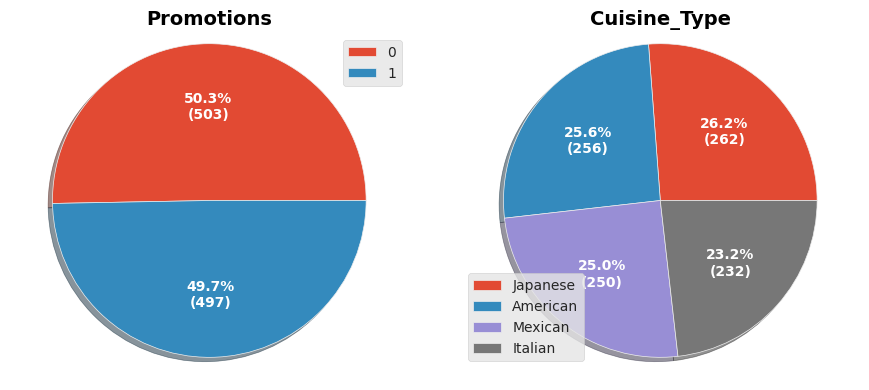

In [12]:
categorical_cols = ['Promotions', 'Cuisine_Type']

plt.style.use('ggplot')
def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (9,4))
ax = ax.flat

for i,col in enumerate(categorical_cols):
    df_class = data[col].value_counts().to_frame()
    labels = df_class.index
    values = df_class.iloc[:,0].to_list()
    ax[i].pie(x = values, labels = labels, autopct=autopct_fun(values), shadow = True, textprops = {'color':'white', 'fontsize':10, 'fontweight':'bold'})
    ax[i].legend(labels)
    ax[i].set_title(col, fontsize = 14, fontweight = "bold", color = "black")
    ax[i].axis('equal')
    ax[i].legend(loc = 'best')

fig.tight_layout()
fig.show()

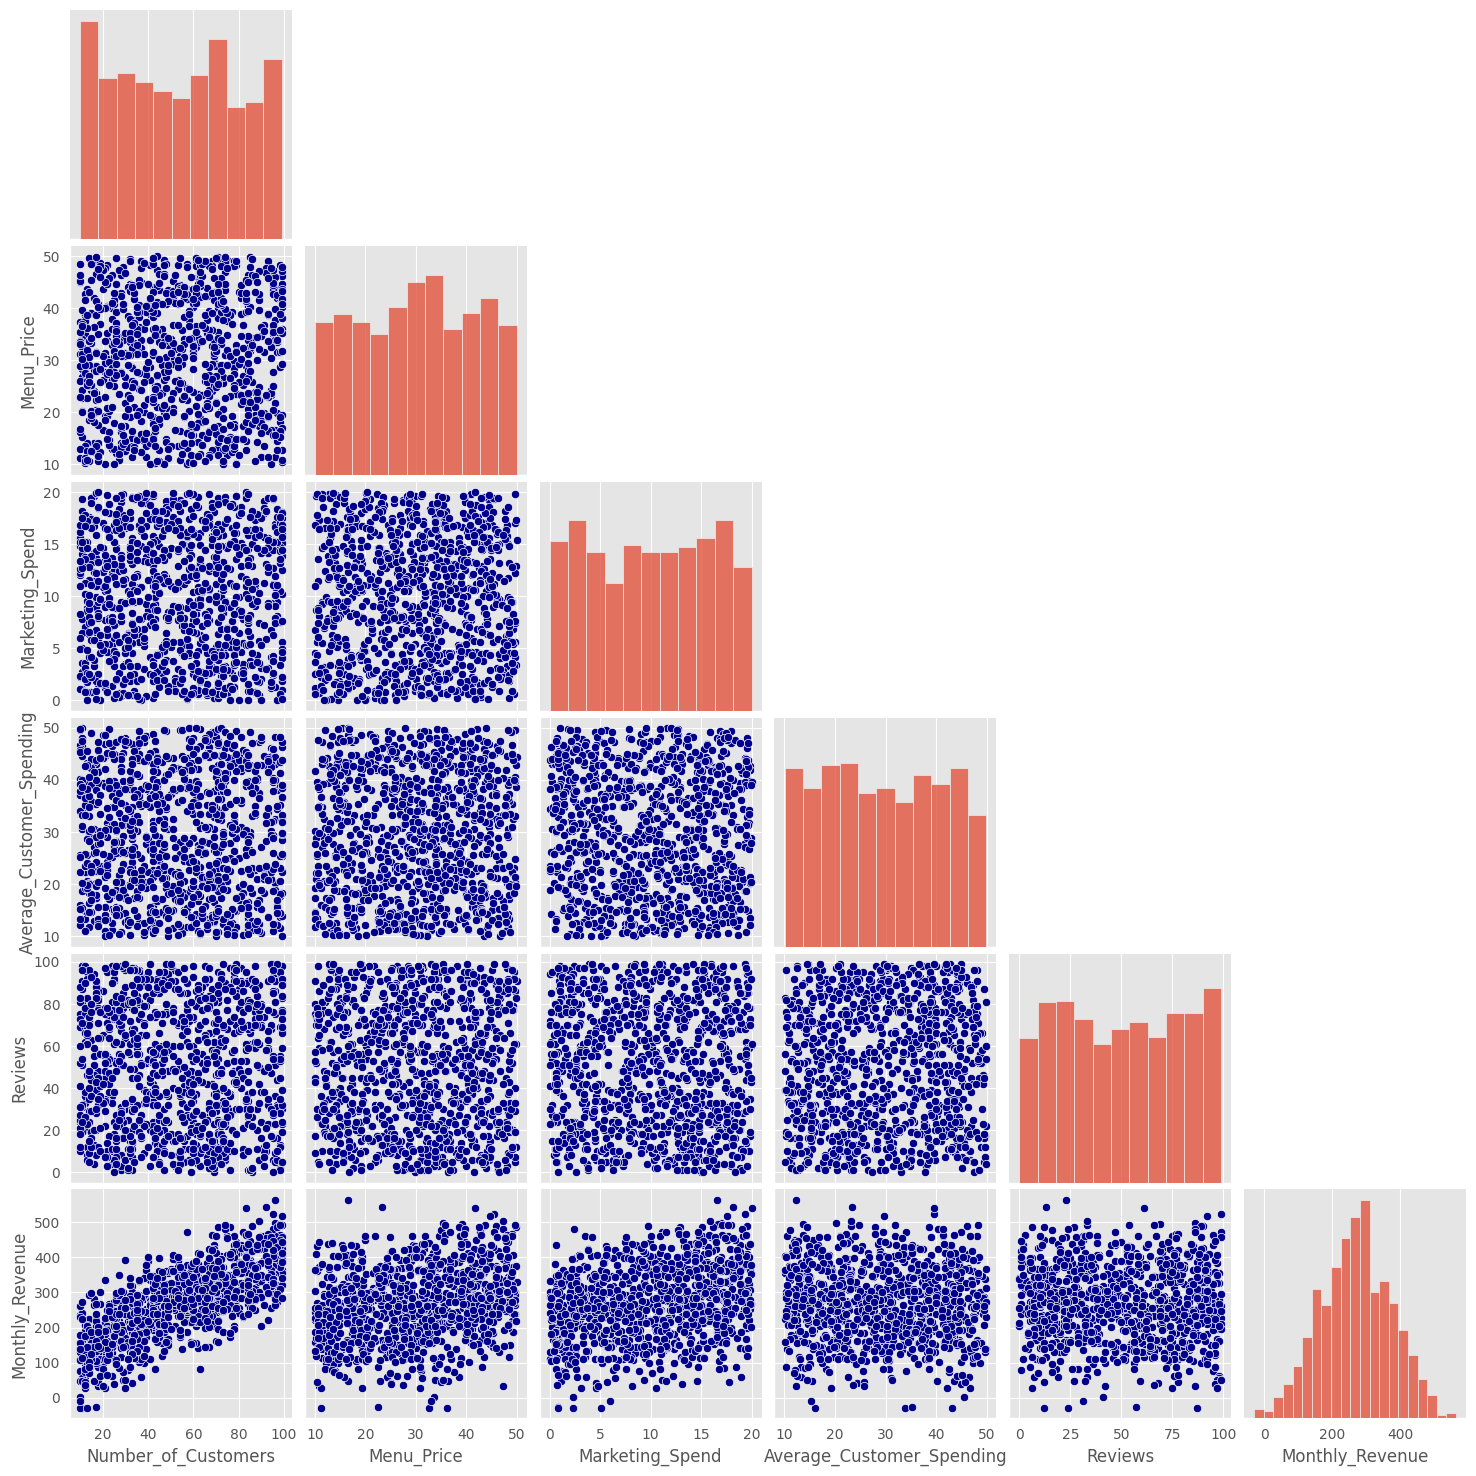

In [13]:
g = sns.pairplot(data[numerical_cols], corner = True, plot_kws = {'color':'darkblue'})
g.fig.show()

According to the graph shown, at first glance we see that there is a strong relationship between Number_of_Customers and Monthly_Revenue. Finally, we make the correlation matrix between numerical variables, we will use the spearman correlation since most of the variables do not come from a population with a Normal Distribution.

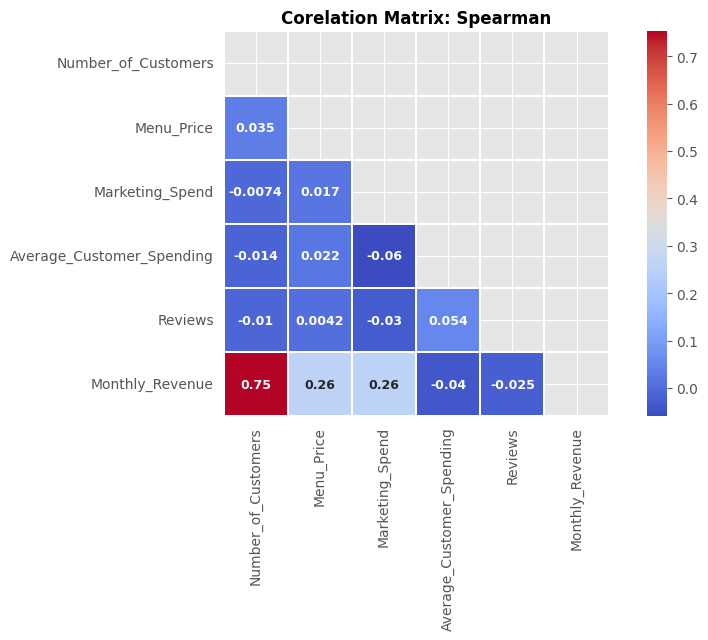

In [14]:
corr_matrix = data[numerical_cols].corr(method = 'spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

plt.figure(figsize = (10, 5))
sns.heatmap(corr_matrix, cmap = 'coolwarm',
            annot = True, mask = mask,
            square = True, annot_kws = {'fontsize':9, 'fontweight':'bold'},
            linewidths = 1.1)

plt.title("Corelation Matrix: Spearman", fontsize = 12, fontweight = 'bold', color = 'black')
plt.show()

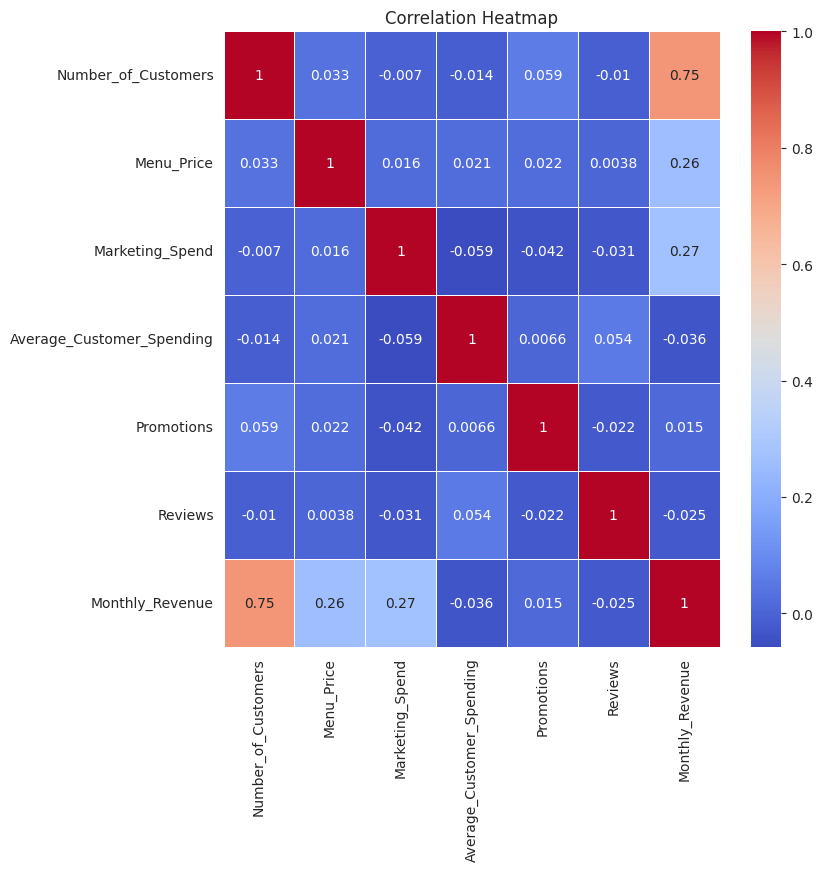

In [52]:
correlation_matrix = data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

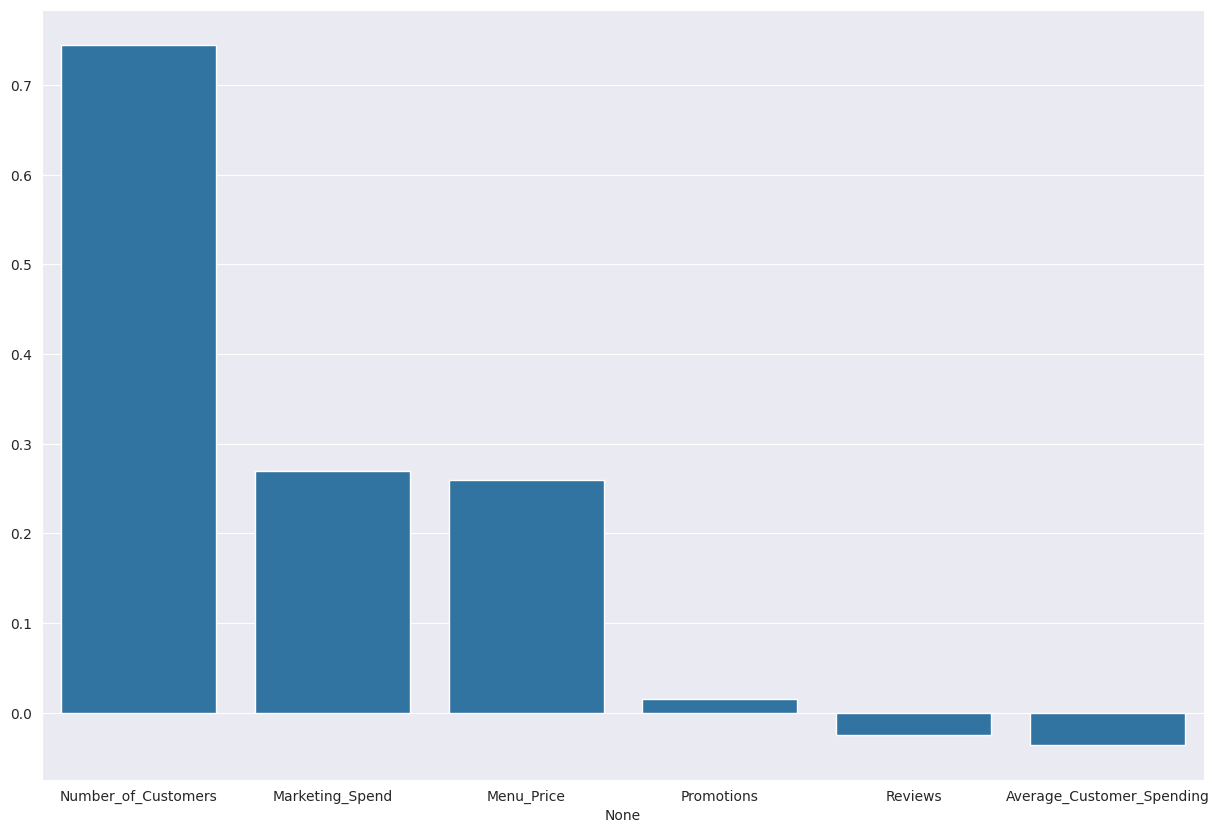

In [53]:
features = correlation_matrix['Monthly_Revenue'].sort_values(ascending=False)[1:]
plt.figure(figsize=(15,10))
sns.barplot(x=features.index,y=features.values)
plt.show()

According to the premise we made when we saw the graph that there was a strong correlation between Number_of_Customers and Monthly_Revenue, it is checked with the value of the coefficient obtained, to ensure that it is significant, we will calculate the p-value on this correlation . We will use a 95% confidence level.

In [15]:
pg.corr(data['Number_of_Customers'], data['Monthly_Revenue'], method = 'spearman')

,n,r,CI95%,p-val,power
spearman,1000,0.752419,"[0.72, 0.78]",3.680076e-183,1.0


As we can see the p-value is less than the significance level which tells us that there is a significant relationship between both variables.

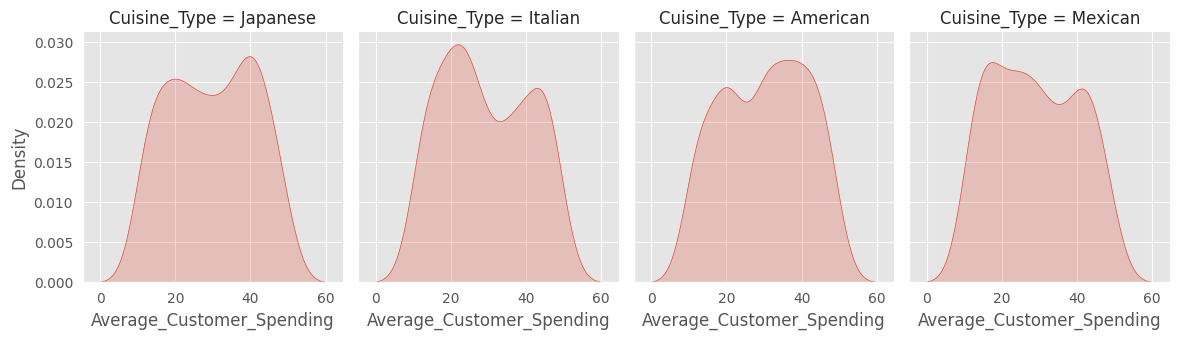

In [16]:
g = sns.FacetGrid(data, col="Cuisine_Type", height=3.5, aspect=.85)
g.map(sns.kdeplot, "Average_Customer_Spending",fill = True)
g.fig.show()

In [17]:
data.groupby('Cuisine_Type')['Average_Customer_Spending'].describe()

,count,mean,std,min,25%,50%,75%,max
Cuisine_Type,,,,,,,,
American,256.0,30.071254,11.367564,10.037177,20.155670,30.792563,39.768225,49.751359
Italian,232.0,29.251461,11.633264,10.272588,19.699094,27.676848,39.560984,49.820439
Japanese,262.0,29.784450,11.445853,10.205585,19.863438,30.290013,39.726435,49.900725
Mexican,250.0,28.755917,11.478052,10.108326,18.342358,28.069382,38.894862,49.818966


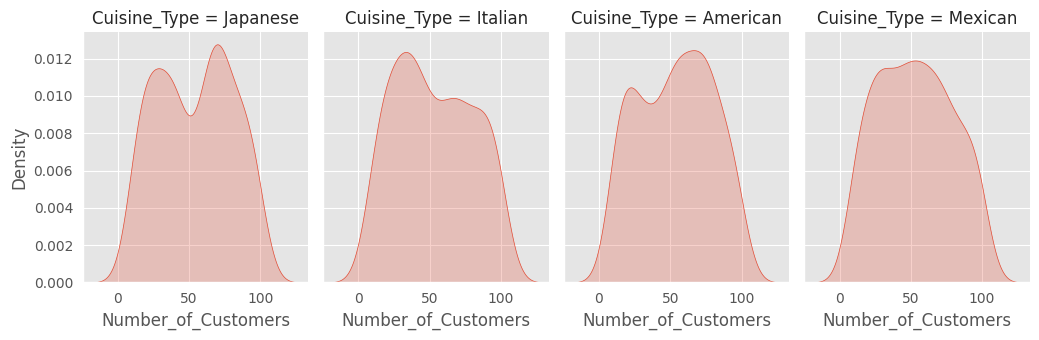

In [18]:
g = sns.FacetGrid(data, col="Cuisine_Type", height=3.5, aspect=.75)
g.map(sns.kdeplot, "Number_of_Customers",fill = True)
g.fig.show()

In [19]:
data.groupby('Cuisine_Type')['Number_of_Customers'].describe()

,count,mean,std,min,25%,50%,75%,max
Cuisine_Type,,,,,,,,
American,256.0,53.445312,26.013966,10.0,30.75,55.0,75.00,99.0
Italian,232.0,52.771552,27.139761,10.0,30.00,50.0,75.25,99.0
Japanese,262.0,53.973282,26.441927,10.0,31.00,59.0,74.00,99.0
Mexican,250.0,52.820000,26.049913,10.0,30.25,53.0,73.00,99.0


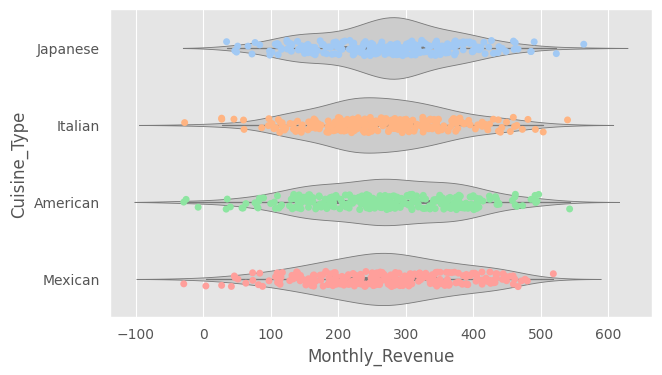

In [20]:
fig,ax = plt.subplots(figsize = (7,4))
sns.violinplot(data,
               x = 'Monthly_Revenue',
               y = 'Cuisine_Type',
               color = '.8',
               ax = ax)
sns.stripplot(data,
              x = 'Monthly_Revenue',
              y = 'Cuisine_Type',
              palette = 'pastel',
              ax = ax)
fig.show()

In [21]:
data.groupby('Cuisine_Type')['Monthly_Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
Cuisine_Type,,,,,,,,
American,256.0,269.604825,110.873108,-28.977809,187.561999,271.204821,354.424106,542.467282
Italian,232.0,263.699862,100.384733,-27.610276,201.396843,260.005429,329.089894,539.371604
Japanese,262.0,271.700186,98.654120,34.494211,204.959483,277.851879,335.752620,563.381332
Mexican,250.0,269.366082,105.861554,-28.920890,195.775891,267.840516,344.200708,518.327003


Cuisine_Type vs Promotions

In [22]:
expected, observed, stats = pg.chi2_independence(data, x='Cuisine_Type',
                                                 y='Promotions')

In [23]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,1.519196,3.0,0.677847,0.038977,0.154392
1,cressie-read,0.666667,1.519432,3.0,0.677793,0.038980,0.154411
2,log-likelihood,0.000000,1.520162,3.0,0.677625,0.038989,0.154467
3,freeman-tukey,-0.500000,1.520936,3.0,0.677447,0.038999,0.154526
4,mod-log-likelihood,-1.000000,1.521904,3.0,0.677224,0.039012,0.154601
5,neyman,-2.000000,1.524426,3.0,0.676645,0.039044,0.154795


In [24]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,1.519196,3.0,0.677847,0.038977,0.154392
1,cressie-read,0.666667,1.519432,3.0,0.677793,0.038980,0.154411
2,log-likelihood,0.000000,1.520162,3.0,0.677625,0.038989,0.154467
3,freeman-tukey,-0.500000,1.520936,3.0,0.677447,0.038999,0.154526
4,mod-log-likelihood,-1.000000,1.521904,3.0,0.677224,0.039012,0.154601
5,neyman,-2.000000,1.524426,3.0,0.676645,0.039044,0.154795


All p-values ​​give us a value greater than 0.05, which tells us that there is no association between the variables Cuisine_Type and Promotions.

Previously we performed the Spearman correlation between numerical variables, and the chi square test between categorical variables, but we would need to do some type of correlation between all the variables, regardless of the type, in this case we will use the power predictive score ( pps).

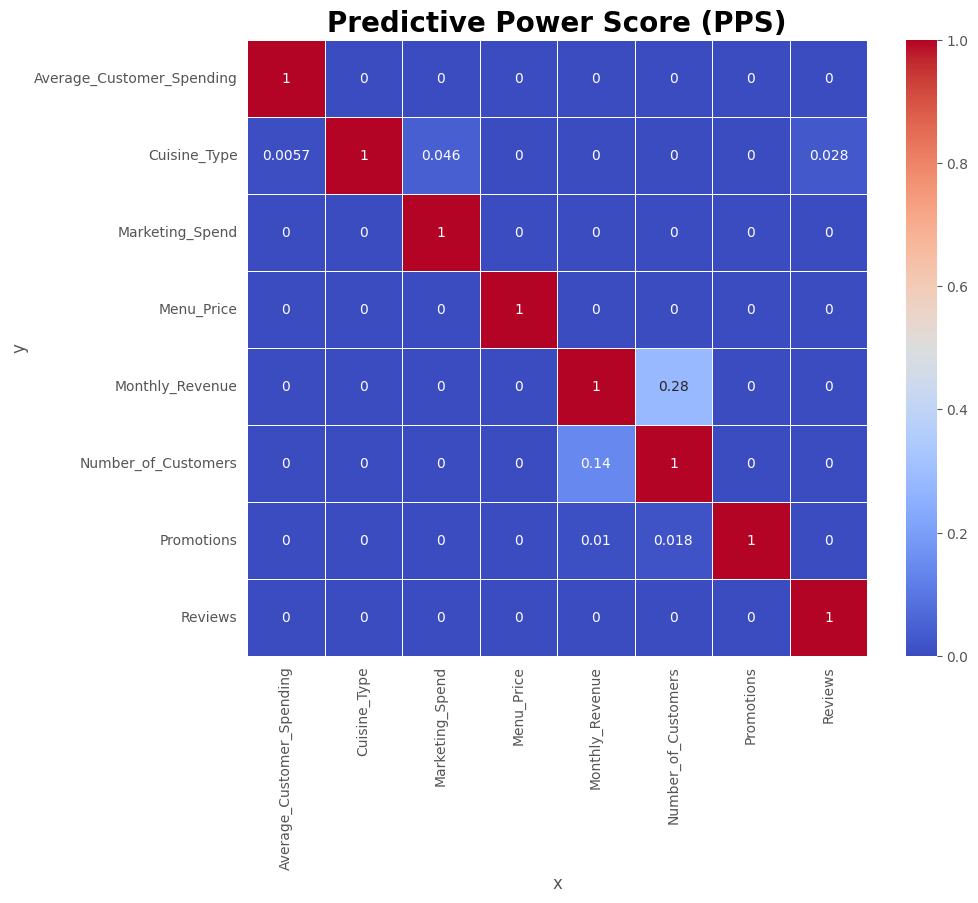

In [25]:
matrix_df = pps.matrix(data)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

plt.figure(figsize = (10,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="coolwarm", linewidths=0.5, annot=True)
plt.title("Predictive Power Score (PPS)", fontsize = 20, fontweight = 'bold', color = 'black')
plt.show()

In [26]:
X = data.drop('Monthly_Revenue', axis = 1)
y = data['Monthly_Revenue']

In [27]:
SEED = 42

X_train, X_test, y_train, y_test = tts(X,
                                       y,
                                       test_size = 0.3,
                                       random_state = SEED)

In [28]:
numerical_features = ['Number_of_Customers', 'Menu_Price', 'Marketing_Spend',
                      'Average_Customer_Spending', 'Reviews']

categorical_features = ['Cuisine_Type']

In [29]:
# Preprocessing for our base model.
preprocessor_base = ColumnTransformer([('ohe',
                                     OneHotEncoder(drop = 'first',
                                                   sparse_output = False,
                                                   handle_unknown = 'ignore'),
                                     categorical_features),
                                    ('scaler',
                                     StandardScaler(),
                                     numerical_features)],
                                   remainder = 'passthrough',
                                   verbose_feature_names_out = False).set_output(transform = 'pandas')

X_train_prep_base = preprocessor_base.fit_transform(X_train)
X_test_prep_base = preprocessor_base.transform(X_test)

In [30]:
# Preprocessing for the other models.
preprocessor = ColumnTransformer([('ohe',
                                     OneHotEncoder(drop = 'first',
                                                   sparse_output = False,
                                                   handle_unknown = 'ignore'),
                                     categorical_features)],
                                   remainder = 'passthrough',
                                   verbose_feature_names_out = False).set_output(transform = 'pandas')

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [31]:
model_base = LinearRegression()
model_base.fit(X_train_prep_base, y_train)

y_pred_train_base = model_base.predict(X_train_prep_base)
y_pred_test_base = model_base.predict(X_test_prep_base)

print(f'MAE Train: {mean_absolute_error(y_train, y_pred_train_base):.4f}')
print(f'MAE Test: {mean_absolute_error(y_test, y_pred_test_base):.4f}')

MAE Train: 46.4763
MAE Test: 46.7224


In [32]:
# We define the candidate models
reg1 = RandomForestRegressor(random_state = SEED, n_jobs = -1)
reg2 = ExtraTreesRegressor(bootstrap = True, n_jobs = -1, random_state = SEED)
reg3 = XGBRegressor(random_state = SEED, n_jobs = -1)
reg4 = LGBMRegressor(random_state = SEED, n_jobs = -1)
reg5 = CatBoostRegressor(random_state = SEED, verbose = 0)

MODELS = [reg1, reg2, reg3, reg4, reg5]

In [33]:
# Training!!!
#=====================================================================
mae_train = {}
mae_test = {}

for model in tqdm(MODELS):
    name = type(model).__name__
    model.fit(X_train_prep, y_train)
    y_pred_train = model.predict(X_train_prep)
    y_pred_test = model.predict(X_test_prep)
    mae_train[name] = mean_absolute_error(y_train, y_pred_train)
    mae_test[name] = mean_absolute_error(y_test, y_pred_test)
    print(f'* {name} finished.')

  0%|          | 0/5 [00:00<?, ?it/s]

* RandomForestRegressor finished.
* ExtraTreesRegressor finished.
* XGBRegressor finished.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 9
[LightGBM] [Info] Start training from score 269.567483
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

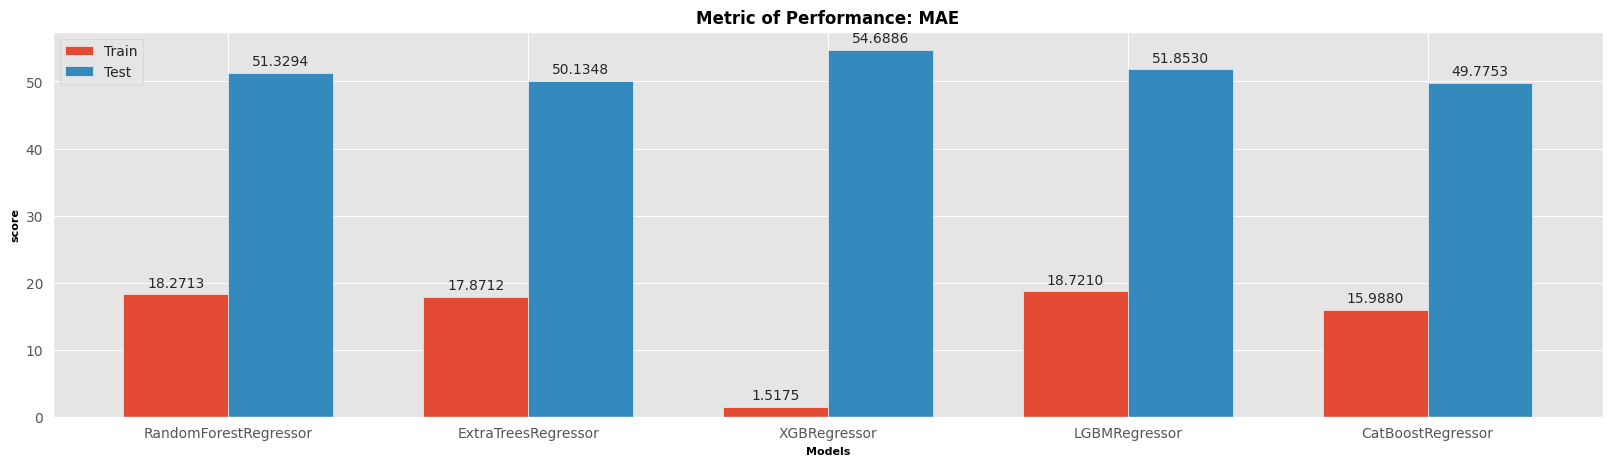

In [34]:
metric_train = pd.DataFrame.from_dict(mae_train, orient = 'index')
metric_train = metric_train.rename(columns = {0:'Train'})

metric_test = pd.DataFrame.from_dict(mae_test, orient = 'index')
metric_test = metric_test.rename(columns = {0:'Test'})

fig,ax = plt.subplots(figsize = (20,5))

labels = metric_train.index.to_list()
values_train = metric_train.iloc[:,0].to_list()
values_test = metric_test.iloc[:,0].to_list()
x = np.arange(len(labels))
width = 0.35

rects1 = ax.bar(x = x - width/2, height = values_train, width = width, label = 'Train')
rects2 = ax.bar(x = x + width/2, height = values_test, width = width, label = 'Test')


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(text = f'{height:.4f}',
                    xy = (rect.get_x() + rect.get_width()/2, height),
                    xytext = (0,3),
                    textcoords = "offset points",
                    ha = "center",
                    va = "bottom")

autolabel(rects1)
autolabel(rects2)
ax.legend()
ax.set_title("Metric of Performance: MAE", fontsize = 12, fontweight = "bold", color = "black")
ax.set_ylabel("score", fontsize = 8, fontweight = "bold", color = "black")
ax.set_xlabel("Models", fontsize = 8, fontweight = "bold", color = "black")
ax.set_xticks(x)
ax.set_xticklabels(labels)
fig.show()

No model outperformed our base model, which generalized well, all candidate models suffered from overfitting, that is, they fit well to the training data but not to the test data.

We are going to analyze the residuals of our winning model, which is the base model.

In [44]:
residuals_train = y_train - y_pred_train_base
residuals_test = y_test - y_pred_test_base

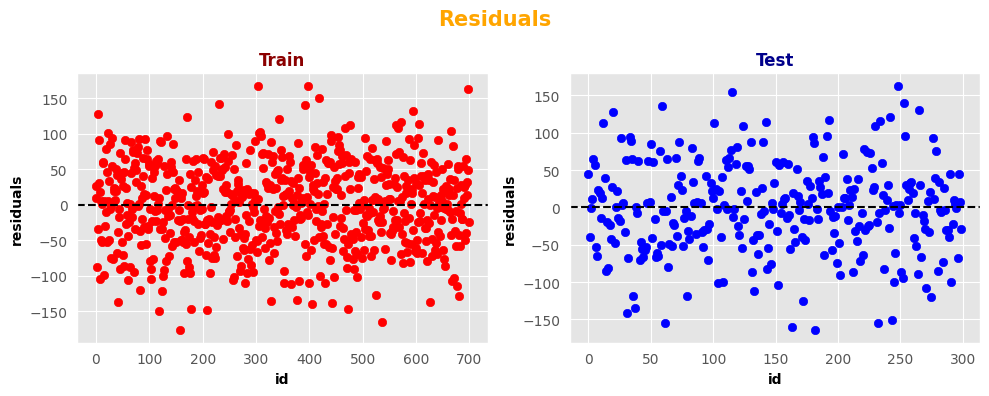

In [36]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
sns.set_style('darkgrid')
ax[0].scatter(x = np.arange(len(residuals_train)), y = residuals_train, color = 'red', label = 'Train')
ax[0].axhline(y = 0, linestyle = '--', color = 'black')
ax[1].scatter(x = np.arange(len(residuals_test)), y = residuals_test, color = 'blue', label = 'Test')
ax[1].axhline(y = 0, linestyle = '--', color = 'black')

ax[0].set_title("Train", fontsize = 12, fontweight = 'bold', color = 'darkred')
ax[1].set_title("Test", fontsize = 12, fontweight = 'bold', color = 'darkblue')

ax[0].set_xlabel("id", fontsize = 10, fontweight = 'bold', color = 'black')
ax[0].set_ylabel("residuals", fontsize = 10, fontweight = 'bold', color = 'black')

ax[1].set_xlabel("id", fontsize = 10, fontweight = 'bold', color = 'black')
ax[1].set_ylabel("residuals", fontsize = 10, fontweight = 'bold', color = 'black')

fig.suptitle("Residuals", fontsize = 15, fontweight = "bold", color = 'orange')
fig.tight_layout()
fig.show()

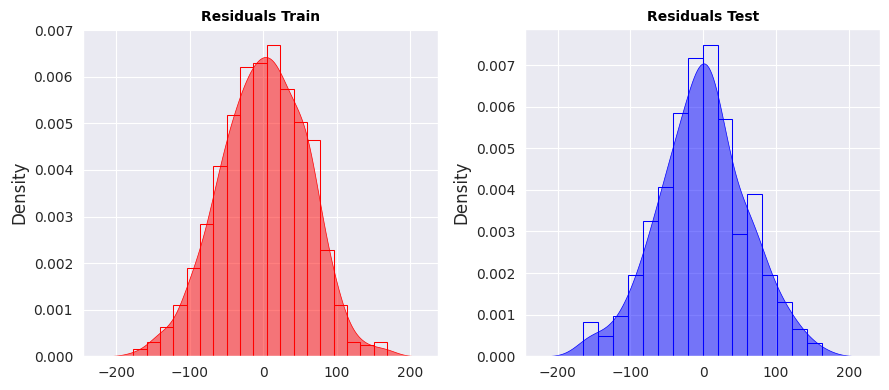

In [37]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (9,4))
ax = ax.flat

sns.histplot(residuals_train, stat = 'density', fill = False, color = 'red', ax = ax[0])
sns.kdeplot(residuals_train, fill = True, alpha = 0.5, color = 'red', ax = ax[0])

sns.histplot(residuals_test, stat = 'density', fill = False, color = 'blue', ax = ax[1])
sns.kdeplot(residuals_test, fill = True, alpha = 0.5, color = 'blue', ax = ax[1])
ax[0].set_title("Residuals Train", fontsize = 10, fontweight = 'bold', color = 'black')
ax[1].set_title("Residuals Test", fontsize = 10, fontweight = 'bold', color = 'black')

ax[0].set_xlabel("")
ax[1].set_xlabel("")
fig.tight_layout()
fig.show()

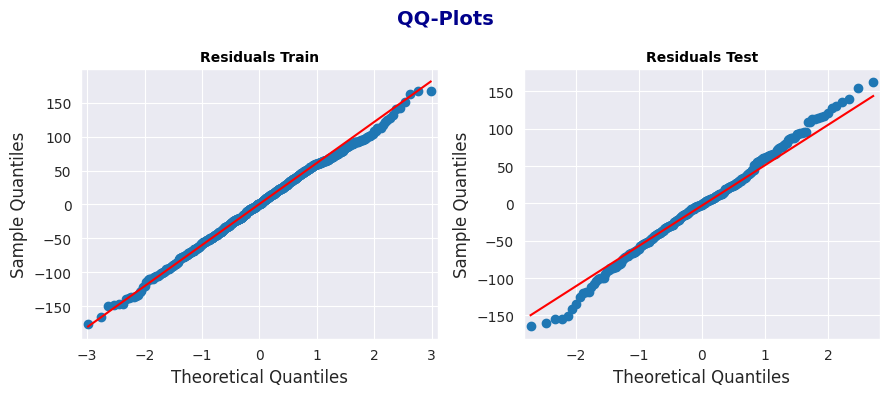

In [38]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (9,4))
ax = ax.flat
plt.style.use('default')
sm.qqplot(residuals_train, line = 'q', ax = ax[0])
sm.qqplot(residuals_test, line = 'q', ax = ax[1])
ax[0].set_title("Residuals Train", fontsize = 10, fontweight = 'bold', color = 'black')
ax[1].set_title("Residuals Test", fontsize = 10, fontweight = 'bold', color = 'black')
fig.suptitle("QQ-Plots", fontsize = 14, fontweight = 'bold', color = 'darkblue')
fig.tight_layout()
fig.show()

In [ ]:
p_value_train = stats.shapiro(residuals_train)[1]
p_value_test = stats.shapiro(residuals_test)[1]

print(f'p-value train: {p_value_train:.4f}')
print(f'p-value test: {p_value_test:.4f}')

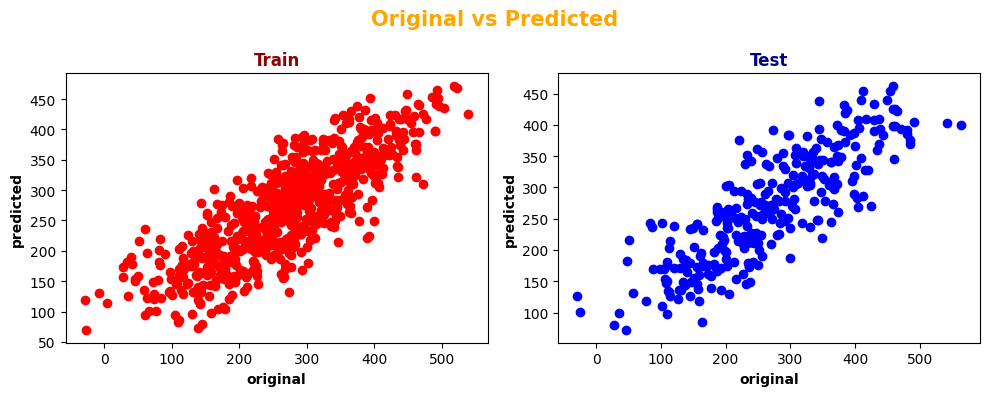

In [46]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
sns.set_style('darkgrid')
ax[0].scatter(x = y_train, y = y_pred_train_base, color = 'red', label = 'Train')
ax[1].scatter(x = y_test, y = y_pred_test_base, color = 'blue', label = 'Test')

ax[0].set_title("Train", fontsize = 12, fontweight = 'bold', color = 'darkred')
ax[1].set_title("Test", fontsize = 12, fontweight = 'bold', color = 'darkblue')

ax[0].set_xlabel("original", fontsize = 10, fontweight = 'bold', color = 'black')
ax[0].set_ylabel("predicted", fontsize = 10, fontweight = 'bold', color = 'black')

ax[1].set_xlabel("original", fontsize = 10, fontweight = 'bold', color = 'black')
ax[1].set_ylabel("predicted", fontsize = 10, fontweight = 'bold', color = 'black')

fig.suptitle("Original vs Predicted", fontsize = 15, fontweight = "bold", color = 'orange')
fig.tight_layout()
fig.show()

In [47]:
# MSE
print(f'MSE Train: {mean_squared_error(y_train, y_pred_train_base):.4f}')
print(f'MSE Test: {mean_squared_error(y_test, y_pred_test_base):.4f}')

MSE Train: 3325.7589
MSE Test: 3611.7284


In [48]:
# R2
print(f'R2 Train: {r2_score(y_train, y_pred_train_base):.4f}')
print(f'R2 Test: {r2_score(y_test, y_pred_test_base):.4f}')

R2 Train: 0.6783
R2 Test: 0.6959


  0%|          | 0/300 [00:00<?, ?it/s]

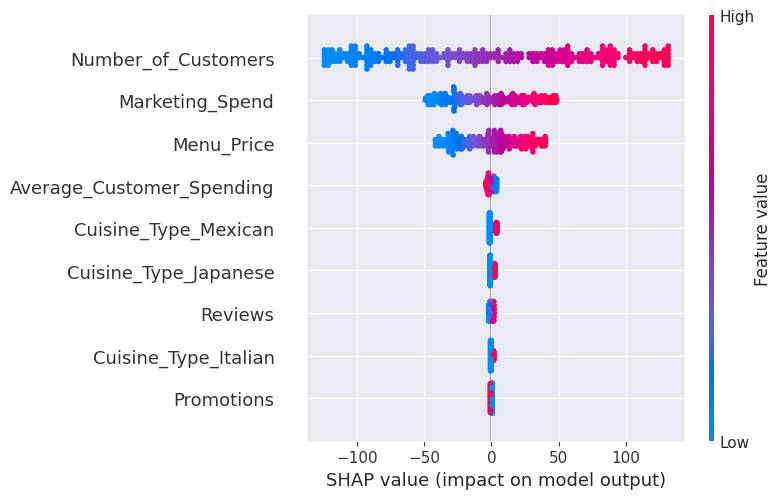

In [49]:
explainer = shap.KernelExplainer(model_base.predict, X_train_prep_base)
shap_values = explainer.shap_values(X_test_prep_base)

shap.summary_plot(shap_values,X_test_prep_base)
shap.initjs()